In [1]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=fetch_lfw_people(min_faces_per_person=70,
                      resize=1,
                      slice_=(slice(0,250,None),
                              slice(0,250,None)))

In [4]:
data

{'data': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [1.3333334, 1.3333334, 1.3333334, ..., 0.       , 0.       ,
         0.       ],
        [2.3333333, 2.3333333, 1.6666666, ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.6666667, 0.6666667, 0.6666667, ..., 0.6666667, 0.6666667,
         0.6666667],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 'images': array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [  1.        ,   1.        ,   1.6666666 , ...,   0.       

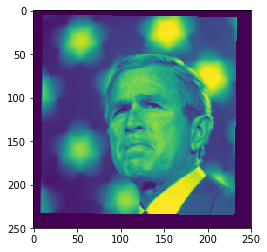

In [7]:
plt.imshow(data.images[12])

In [9]:
data.images.shape

(1288, 250, 250)

In [10]:
images=data.images

In [12]:
target=data.target_names
target

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [13]:
x=data.data
x.shape

(1288, 62500)

In [16]:
y=data.target
y.shape

(1288,)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.12)

In [18]:
import time
start=time.time()
svc=SVC()
svc.fit(x_train,y_train)
print(svc.score(x_test,y_test))
end=time.time()
print(end-start)

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.45806451612903226
470.20099806785583


In [19]:
newsvc=SVC()
newsvc.fit(x_train,y_train)
pac=PCA(n_components=150,svd_solver="randomized",whiten=True)
pac.fit(x)

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [21]:
print(type(pac))

<class 'sklearn.decomposition.pca.PCA'>


In [22]:
x_train_pac=pac.transform(x_train)

In [23]:
x_test_pac=pac.transform(x_test)

In [24]:
newsvc.score(x_test,y_test)

0.45806451612903226

In [25]:
svc_best=SVC()
svc.fit(x_train_pac,y_train)
print(svc.score(x_test_pac,y_test))

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6774193548387096


In [26]:
g_svc=SVC()
param_grid={"C":[0.2,0.5,0.8,1.3,5,7,9],
            "gamma":[0.001,0.002,0.003,0.01,0.05,0.1]}

In [27]:
gcv=GridSearchCV(g_svc,param_grid=param_grid)
gcv.fit(x_train_pac,y_train)

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.2, 0.5, 0.8, 1.3, 5, 7, 9], 'gamma': [0.001, 0.002, 0.003, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [29]:
svc_last=SVC(C=1.0,gamma=0.01)
svc_last.fit(x_train_pac,y_train)
svc.score(x_test_pac,y_test)

0.6774193548387096

In [35]:
y_last=svc_last.predict(x_test_pac[:20])

In [36]:
y_last

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 6, 3, 3, 3, 1, 3, 3],
      dtype=int64)

In [37]:
y_test[:20]

array([3, 5, 3, 1, 3, 1, 6, 1, 1, 3, 3, 6, 0, 6, 6, 6, 1, 1, 6, 5],
      dtype=int64)

In [42]:
# 预测名字和真实名字
target_names=data.target_names
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
#y_test是图片数据
#row代表多少行，columns代表多少列
def draw_picture(X_test,row,columns,titles):
    plt.figure(figsize=(columns*2,row*2.8))
    for i in range(row*columns):
        plt.subplot(row,columns,(i+1))
        plt.imshow(X_test[i].reshape((250,250)),cmap = 'gray')
        plt.title(titles[i])
        plt.axis('off')
title(y_last, y_test, target_names, 3)

'predicted: Bush\ntrue:      Powell'

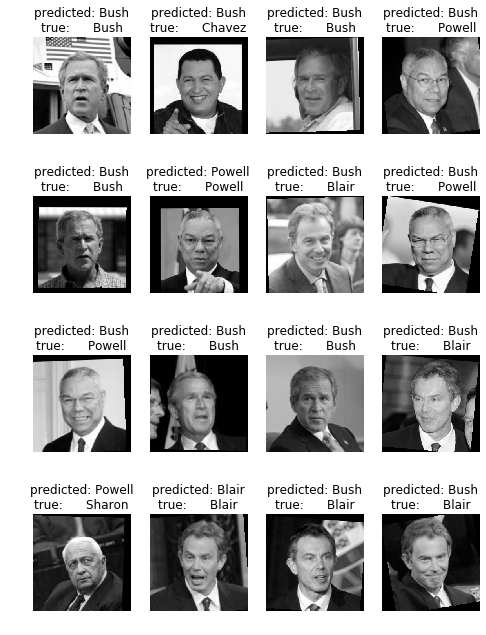

In [45]:
#调用方法获取人脸预测的名字，以及人脸的真实名字
prediction_titles = [title(y_last, y_test, target_names, i)
                     for i in range(20)]
                   
draw_picture(x_test[:20], 4,4,prediction_titles)
#显示
plt.show()